<h2>General Information</h2>

<img src = "https://raw.githubusercontent.com/murataliev/skillfactory_rds/master/module_2/unicef%20logo.jpg">

<p>This was my first ever EDA (exploratory data analysis), performed during the data science course by SkillFactory. The legend was that we have a UNICEF dataset with the results of math exams and living conditions of students. 

We needed to find out how living conditions affect students academic performance. This was necessary in order to identify at-risk students at an early stage. After that we could build an ML model to predict exam results for each student, depending on their living conditions.</p>

<p></p>

<h2>Step 1. Initial Setup</h2>
<p></p>

In [1]:
# Importing modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import scipy.stats as stat
import missingno as msno

In [2]:
# Setting visualization style.
%matplotlib inline
sns.set()

In [3]:
# Increasing the number of visible columns and rows.
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [4]:
# Importing dataset.
stud = pd.read_csv('stud_math.csv')

<h2>Step 2. Preliminary Data Processing</h2>
<p></p>

In [5]:
# First look on the dataset.
stud.info()
stud.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


We've got 395 rows and 30 columns in the dataset. 17 columns have 'object' data type, 12 columns have 'float64' type, and only 'age' column has 'int64' type. Target variable - 'score'.

Let's change some labels and types according to the description to improve readability and consistency of the dataframe.

In [6]:
# Renaming columns to improve readability.
stud.columns = [
    'school', 'sex', 'age', 'domicile_area', 'family_size', 'parents_status',
    'mother_edu', 'father_edu', 'mother_job', 'father_job', 'reason_of_choice', 
    'guardian', 'travel_time', 'home_study_time', 'off_school_fails', 
    'supplementary_edu', 'home_edu', 'paid_edu', 'activities_edu', 'nursery', 
    'granular_study_time', 'desire_for_higher', 'internet', 'romantic_relat', 
    'family_relat', 'free_time', 'friends_time', 'health', 'absences', 'score'
]

In [7]:
# Improving the readability of values for string columns.
stud.sex = stud.sex.apply(
    lambda x: 'female' if x == 'F' 
    else ('male' if x == 'M' else x)
)

stud.domicile_area = stud.domicile_area.apply(
    lambda x: 'urban_area' if x == 'U' 
    else ('rural_area' if x == 'R' else x)
)

stud.family_size = stud.family_size.apply(
    lambda x: 'big_family' if x == 'GT3' 
    else ('small_family' if x == 'LE3' else x)
)

stud.parents_status = stud.parents_status.apply(
    lambda x: 'parents_apart' if x == 'A' 
    else ('parents_together' if x == 'T' else x)
)

In [8]:
# Changing the data type of single 'int64' continuous feature 'age' to 'float64' for consistency.
stud.age = stud.age.astype('float64')

Let's count how many unique values each column contains. Based on this information and columns description, we will determine the data type for each column.

In [9]:
# Counting unique values.
stud.nunique()

school                  2
sex                     2
age                     8
domicile_area           2
family_size             2
parents_status          2
mother_edu              5
father_edu              6
mother_job              5
father_job              5
reason_of_choice        4
guardian                3
travel_time             4
home_study_time         4
off_school_fails        4
supplementary_edu       2
home_edu                2
paid_edu                2
activities_edu          2
nursery                 2
granular_study_time     4
desire_for_higher       2
internet                2
romantic_relat          2
family_relat            6
free_time               5
friends_time            5
health                  5
absences               36
score                  18
dtype: int64

It is clear, that all our variables besides 'age' (8 unique values), 'absences'(36) and 'score' (18) are categorical data. 'Absences' and 'score' are obviously continuous data. 

'Age' feature is more controversial, since the dataset represents a limited age group of students (15-22 years old), and their age is not divided into smaller time periods.

<h2>Step 3. Checking for Missing Values & Duplicates</h2>

Let's check our data for missing values and duplicates. To do this, in addition to the standard Pandas functions, we will use the MissingNo library.

In [10]:
# Checking for missing values.
stud.isnull().sum()

school                  0
sex                     0
age                     0
domicile_area          17
family_size            27
parents_status         45
mother_edu              3
father_edu             24
mother_job             19
father_job             36
reason_of_choice       17
guardian               31
travel_time            28
home_study_time         7
off_school_fails       22
supplementary_edu       9
home_edu               39
paid_edu               40
activities_edu         14
nursery                16
granular_study_time     7
desire_for_higher      20
internet               34
romantic_relat         31
family_relat           27
free_time              11
friends_time            8
health                 15
absences               12
score                   6
dtype: int64

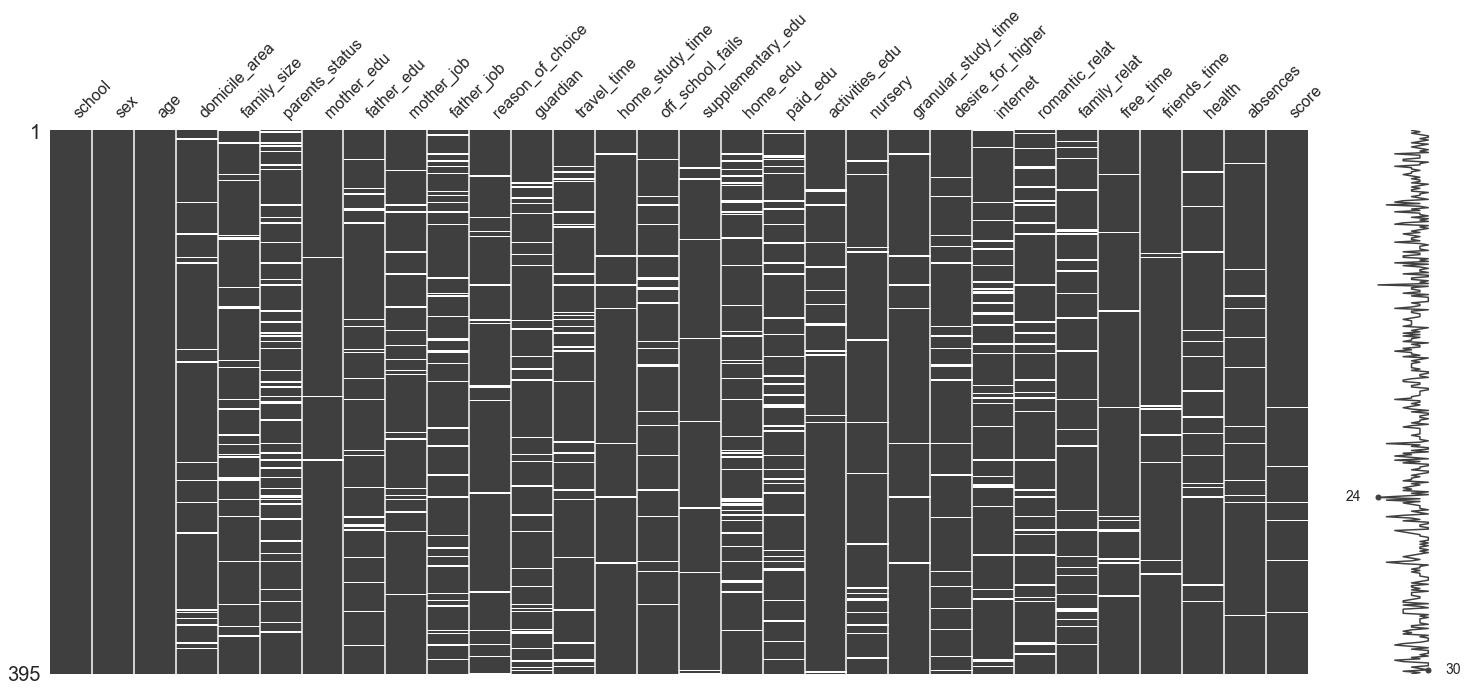

In [11]:
# Visualizing the situation with missing values.
msno.matrix(stud)

Only 'school', 'sex' and 'age' features have no missing values. Unfortunately, if we drop all of them, we will lose ~300 rows, i.e. more than 75% of the dataset. Let's discard the missing values only in the 'score' column (6 rows).

In [12]:
# Dropping missing values in the target variable.
stud = stud.dropna(subset=['score'])

Now let's check if there are any duplicates in the dataset. To do this, we will use the Pandas 'duplicated' function.

In [13]:
# Checking for duplicates.
len(stud[stud.duplicated()])

0

There are no duplicates in the dataset.

<h2>Step 4. Frequency distributions</h2>

Now when the data has been processed, we can move on to analyzing variables. Let's get frequency distribution for each variable.

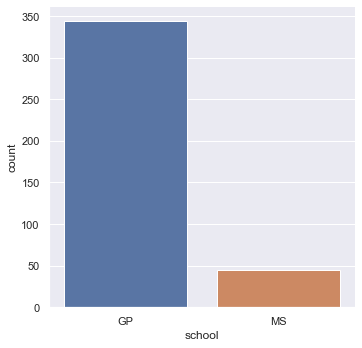

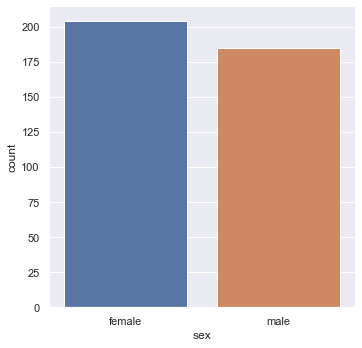

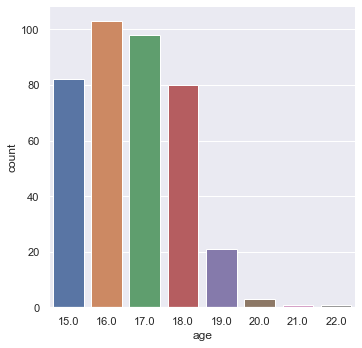

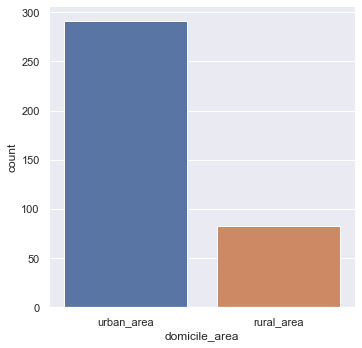

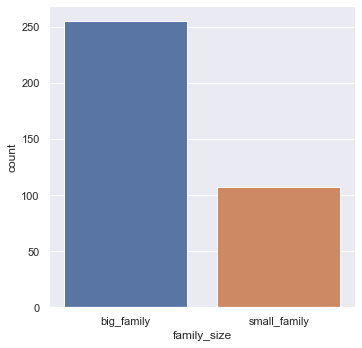

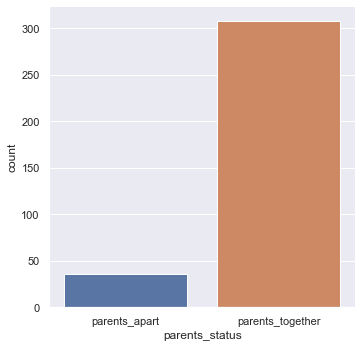

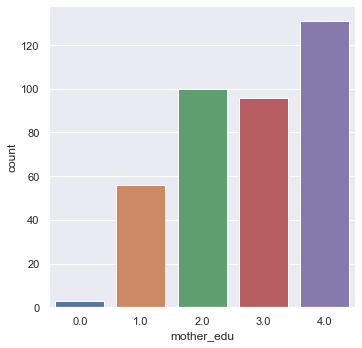

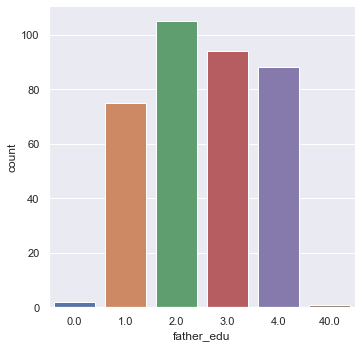

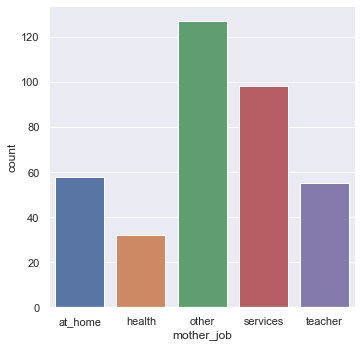

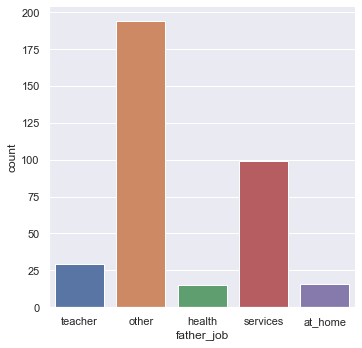

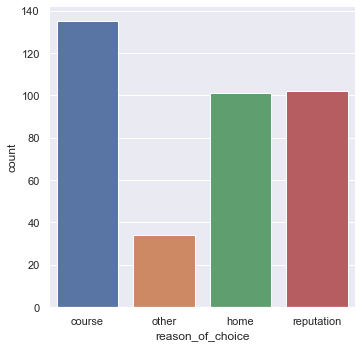

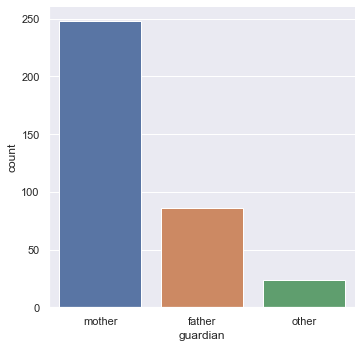

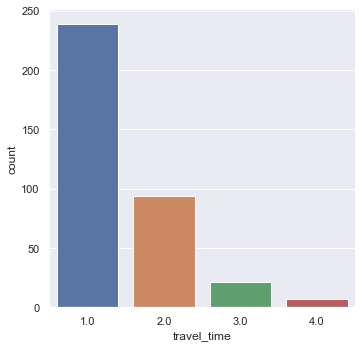

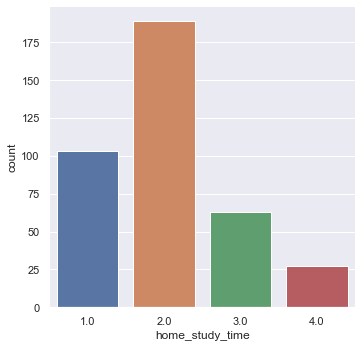

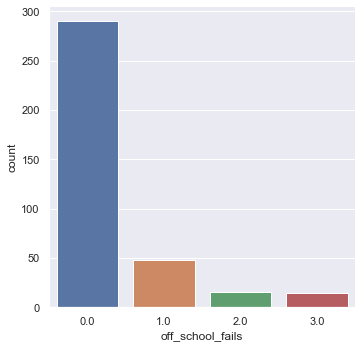

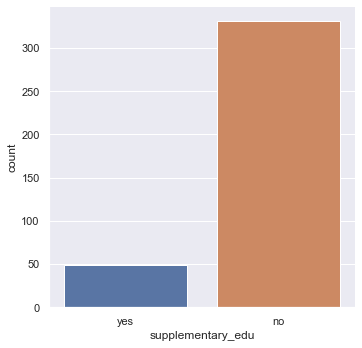

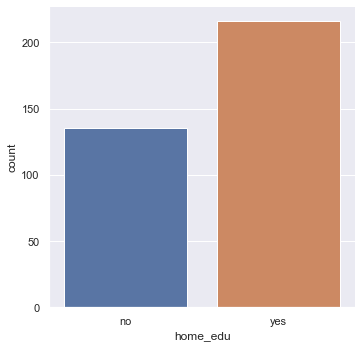

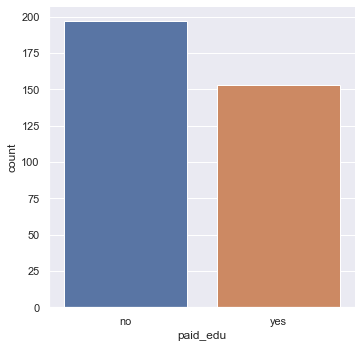

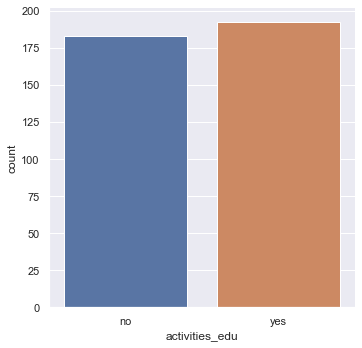

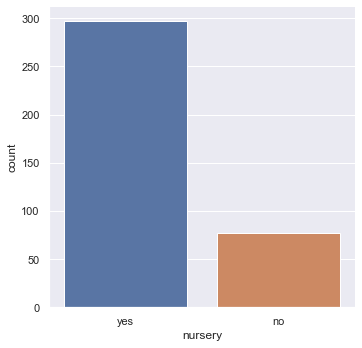

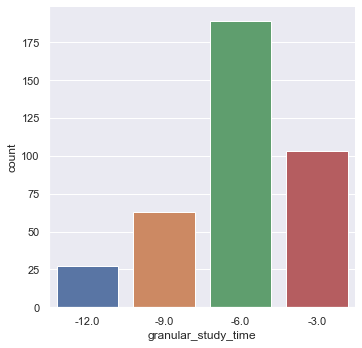

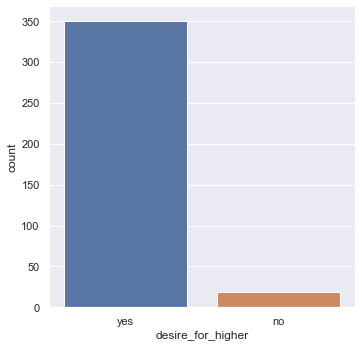

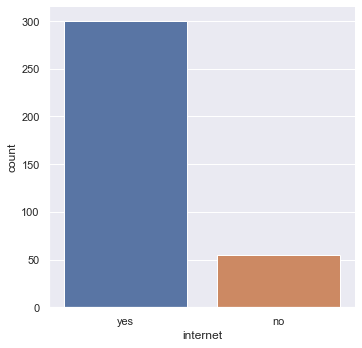

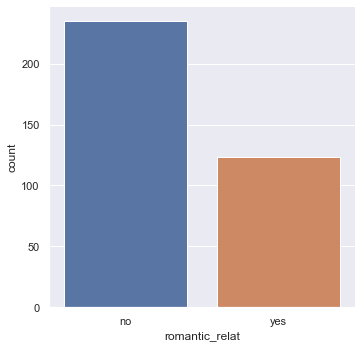

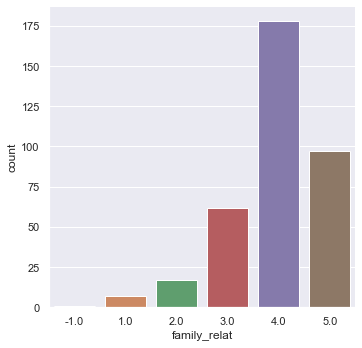

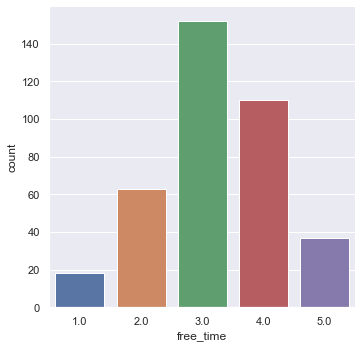

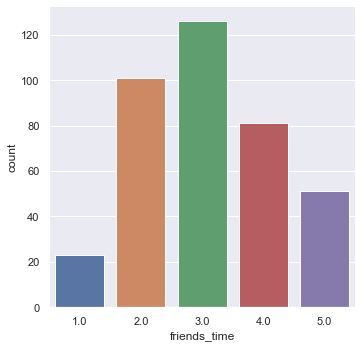

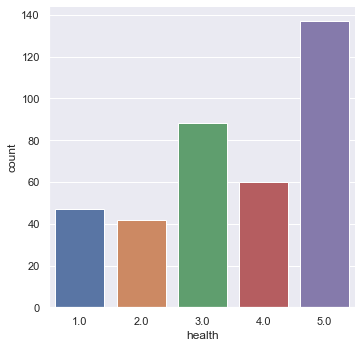

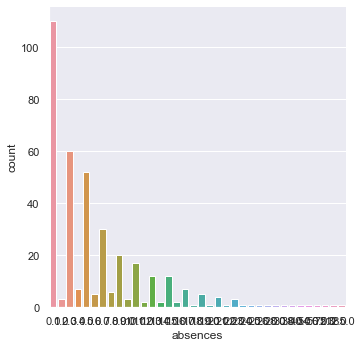

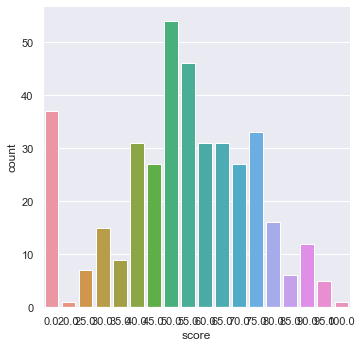

In [14]:
# Getting the frequency distribution of each variable.
for column in stud.columns:
    fig = sns.catplot(x=column, kind="count", data=stud)
    plt.show()

Seems like we have misspeled values in 'fater_edu' and 'family_relat' features. Let's replace them with the correct ones.

In [15]:
# Replacing the misspeled values with the correct ones.
stud.father_edu = stud.father_edu.replace(40, 4)
stud.family_relat = stud.family_relat.replace(-1, 1)

<h2>Step 5. Outliers Detection</h2>

Let's check our data for outliers. To do this, we will define a function and use it to analyze continuous columns.

In [16]:
# Defining the function to get IQR and outliers.
def outliers_find (column):
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    IQR = perc75 - perc25
    low_outlier = perc25 - 1.5*IQR
    high_outlier = perc75 + 1.5*IQR
    low_outlier_amount = len(stud[stud[column] < low_outlier])
    high_outlier_amount = len(stud[stud[column] > high_outlier])
    print(
        'Data for "{}" feature'.format(column),
        '\n25% percentile: {}'.format(perc25),
        '\n75% percentile: {}'.format(perc75),
        '\nIQR: {} '.format(IQR),
        '\nOutliers range: [{l}, {h}]'.format(l=low_outlier, h=high_outlier),
        '\nLower outliers: {}'.format(low_outlier_amount),
        '\nHigher outliers: {}'.format(high_outlier_amount)
)

In [17]:
# Applying function for 'age' feature.
outliers_find('age')

Data for "age" feature 
25% percentile: 16.0 
75% percentile: 18.0 
IQR: 2.0  
Outliers range: [13.0, 21.0] 
Lower outliers: 0 
Higher outliers: 1


In [18]:
# Dropping outliers for 'age' feature.
stud = stud[stud.age <= 21]

In [19]:
# Applying function for 'absences' feature.
outliers_find('absences')

Data for "absences" feature 
25% percentile: 0.0 
75% percentile: 8.0 
IQR: 8.0  
Outliers range: [-12.0, 20.0] 
Lower outliers: 0 
Higher outliers: 17


In [20]:
# Softening the conditions so we don't lose 17 values.
len(stud[stud.absences > 40])

5

In [21]:
# Dropping outliers for 'absences' feature.
stud = stud[stud.absences <= 40]

In [22]:
# Applying function for 'score' feature.
outliers_find('score')

Data for "score" feature 
25% percentile: 40.0 
75% percentile: 70.0 
IQR: 30.0  
Outliers range: [-5.0, 115.0] 
Lower outliers: 0 
Higher outliers: 0


There are no outliers in our target variable.

<h2>Step 6. Correlation Analysis</h2>

Let's find out if any of the numeric features correlate with each other and with the target variable.

In [23]:
# Checking numeric data for correlation.
stud.corr().sort_values(by='score')

,age,mother_edu,father_edu,travel_time,home_study_time,off_school_fails,granular_study_time,family_relat,free_time,friends_time,health,absences,score
off_school_fails,0.146077,-0.233958,-0.253882,0.069425,-0.162291,1.000000,0.162291,-0.022603,0.080049,0.072186,0.108859,0.108044,-0.328250
age,1.000000,-0.151663,-0.133539,0.081811,0.009386,0.146077,-0.009386,0.035060,0.002789,0.095315,-0.051088,0.180973,-0.145918
friends_time,0.095315,0.068060,0.053775,0.036759,-0.044576,0.072186,0.044576,0.071823,0.288460,1.000000,0.005643,0.101902,-0.133812
granular_study_time,-0.009386,-0.069480,0.004188,0.113355,-1.000000,0.162291,1.000000,-0.037785,0.127270,0.044576,0.090486,0.075955,-0.107261
travel_time,0.081811,-0.180948,-0.133269,1.000000,-0.113355,0.069425,0.113355,-0.036533,-0.013191,0.036759,-0.007200,-0.011967,-0.075657
health,-0.051088,-0.058838,0.012887,-0.007200,-0.090486,0.108859,0.090486,0.102508,0.060195,0.005643,1.000000,-0.033302,-0.060221
free_time,0.002789,0.026923,-0.020391,-0.013191,-0.127270,0.080049,0.127270,0.169891,1.000000,0.288460,0.060195,-0.015122,0.013679
absences,0.180973,0.108297,0.051688,-0.011967,-0.075955,0.108044,0.075955,-0.094409,-0.015122,0.101902,-0.033302,1.000000,0.060706
family_relat,0.035060,-0.016402,-0.018486,-0.036533,0.037785,-0.022603,-0.037785,1.000000,0.169891,0.071823,0.102508,-0.094409,0.063690
home_study_time,0.009386,0.069480,-0.004188,-0.113355,1.000000,-0.162291,-1.000000,0.037785,-0.127270,-0.044576,-0.090486,-0.075955,0.107261


The <u>'age'</u>, <u>'mother_edu'</u>,<u>'father_edu'</u>, and <u>'travel_time'</u> features are the predefined conditions. With certain nuances, predefined conditions can also include <u>'family_relat'</u> and <u>'health'</u>.

The <u>'score'</u> feature is a target variable, so it doesn't make sense to use it as an affecting factor.

The <u>'off_school_fails'</u>, <u>'travel_time'</u>, and <u>'free_time'</u> features are negatively correlated with <u>'home_study_time'</u>. It is logical to assume that students who live further away from school and spend more time doing personal things have less time to study outside of school. This can also lead to more problems outside of school.

The feature <u>'off_school_fails'</u> inversely correlates with the level of education of parents, home study time, and positively correlates with age of the student and number of absences. We can assume that the older our students are and the less educated their parents are, the more likely they are to get into trouble outside of school. Perhaps this is due to the fact that the level of education of parents can affect the living conditions in which a teenager lives. As for age, this is probably due to the aspects of puberty.

The <u>'granular_study_time'</u> feature is 100% inversely correlates with <u>'home_study_time'</u>. We can remove it.
<p></p>

In [24]:
# Removing a 'granular_study_time' column that doesn't have a description 
# and 100% inversely correlated with 'home_study_time'.
stud.drop(['granular_study_time'], inplace = True, axis = 1)

The <u>'family_relat'</u> and <u>'free_time'</u> features correlate with each other. Perhaps this means that if there are good relationships in the family, the parents give the child more free time.

The <u>'free_time'</u> and <u>'friends_time'</u> features are closely correlated. This is logical, because if a teenager has a lot of free time, he often spends it with friends.

The <u>'absences'</u> feature correlates with <u>'age'</u>, <u>'off_school_fails'</u> and <u>'friends_time'</u>. This is logical, young people tend to skip classes more during puberty. More time spent with the friends - more chances to miss the classes or get into trouble.

Numeric features that has positively correlated with target variable: <u>'mother_edu'</u>, <u>'father_edu'</u>, <u>'home_study_time'</u>. This seems quite logical. If a student spends a lot of time studying outside of school, this may affect his/her grades. Students 'grades may also depend on their parents' level of education, as more educated parents have a better understanding of the nuances of studying and can provide more qualified assistance.

The inverse correlation with <u>'score'</u> feature is observed in the following numeric features: <u>'off_school_fails'</u>, <u>'age'</u> and <u>'friends_time'</u>. There is also a logical connection. The older teenager is, the more he/she has the temptations associated with puberty, and the less he/she thinks about studying. The more time teenager spends with friends, the less time they have to study. The same applies to troubles outside of school - the more of it, the less likely it is that a teenager will devote time to study, means the higher the probability that he/she will get a low score on the exam.

If we try to visualize our guesses, it will look like this. 

<img src="https://raw.githubusercontent.com/murataliev/skillfactory_rds/master/module_2/correlation.jpg">

- Green features are positively correlated with the score.
- Red features are inversely correlated with the score.
- Grey features don't correlate with the score, but they do correlate with green or red features.
- Green arrows indicate a positive correlation.
- The red arrows indicate an inverse correlation.
- The direction of an arrow indicate our assumption about a cause-and-effect relationship (arrow is directed from cause to effect).
- The two-sided arrows indicate our assumption about the mutual casual link between features.

Thus, we are primarily interested in: <b>parents level of education, home study time, off-school fails, age, and friends time</b>. Secondary signs that may interest us: absences, travel time, free time, and family relationships. For training purposes, let's remove all numeric features that are not directly correlated to the score.

<p></p>

In [25]:
# Removing numeric features, which doesn't correlate with the score.
for column in ['travel_time', 'family_relat', 'free_time', 'health', 'absences']:
    stud.drop([column], inplace = True, axis = 1)

<h2>Step 7. Boxplots for Object Features</h2>

Let's use boxplots to find out how our object features affect the target variable.

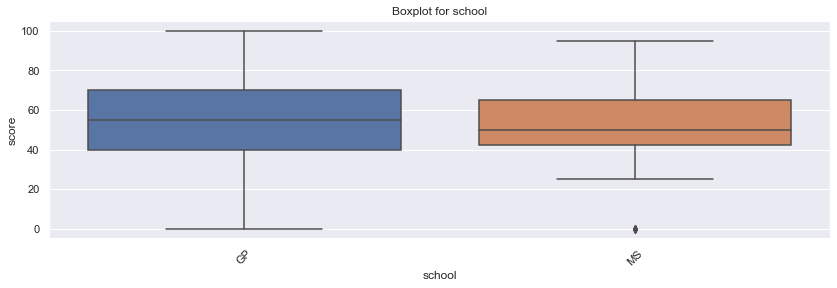

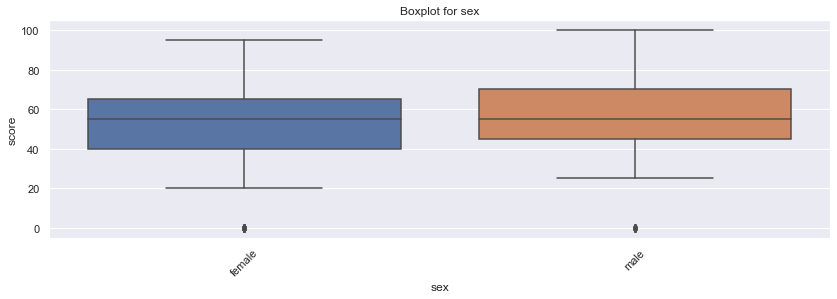

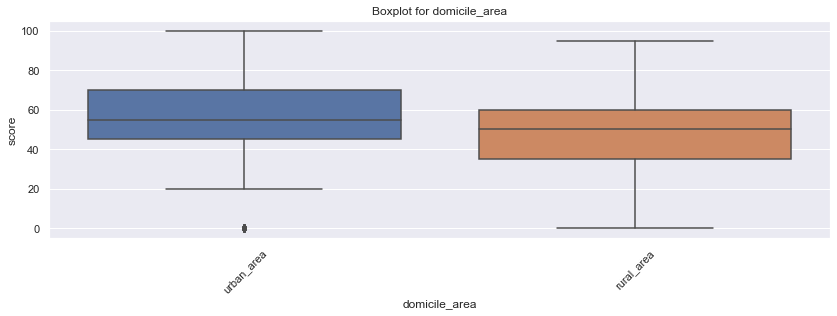

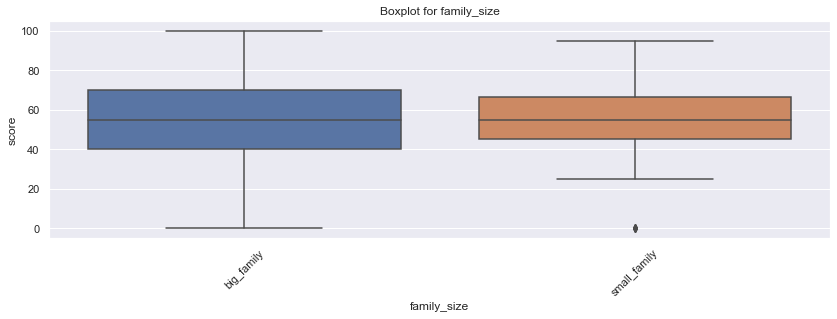

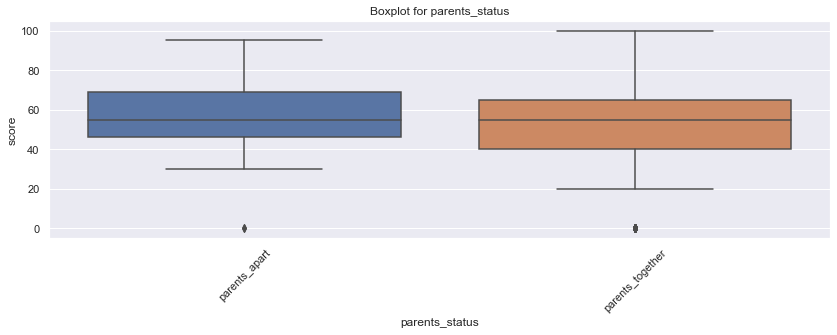

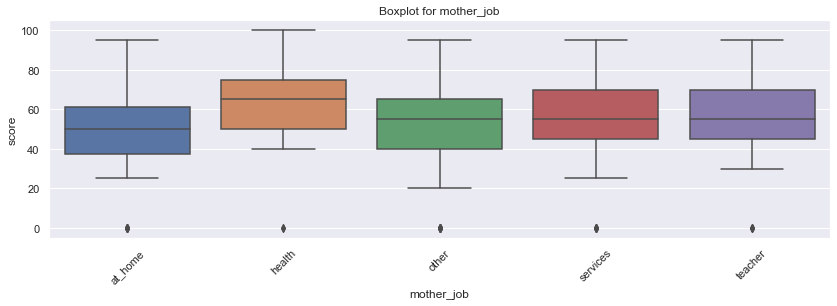

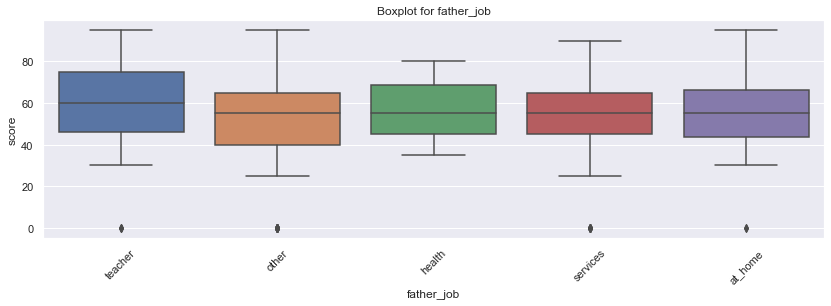

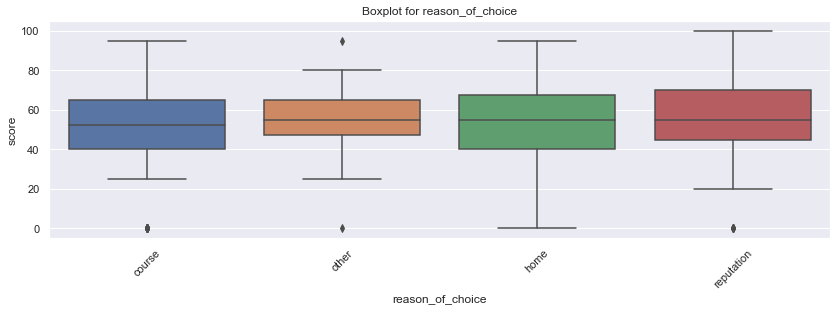

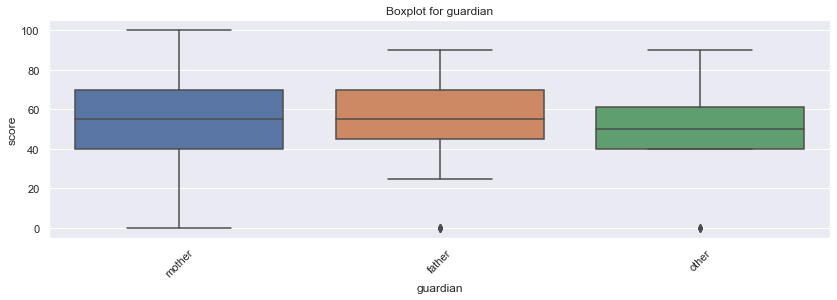

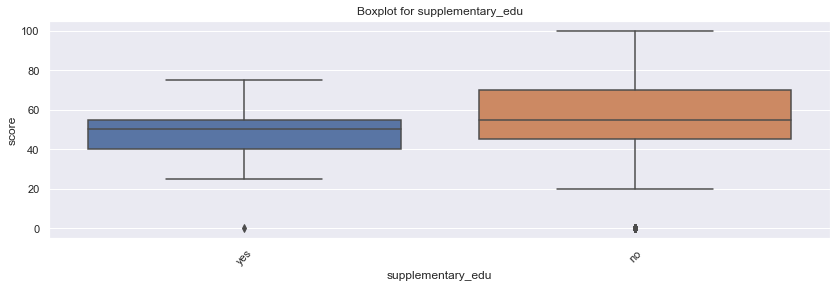

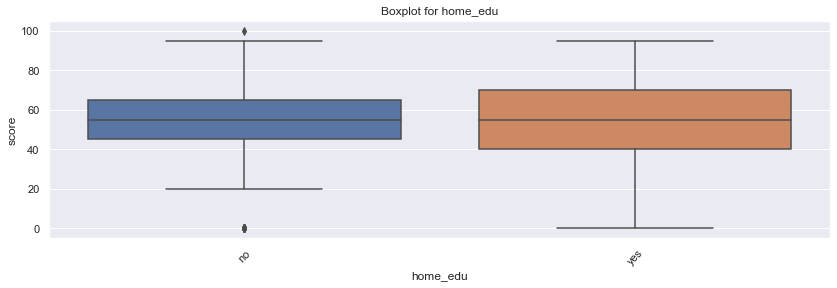

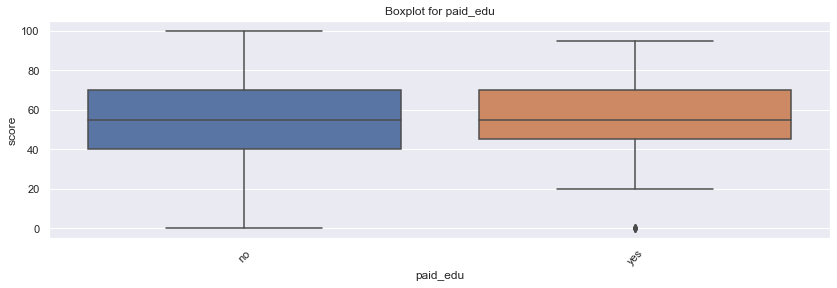

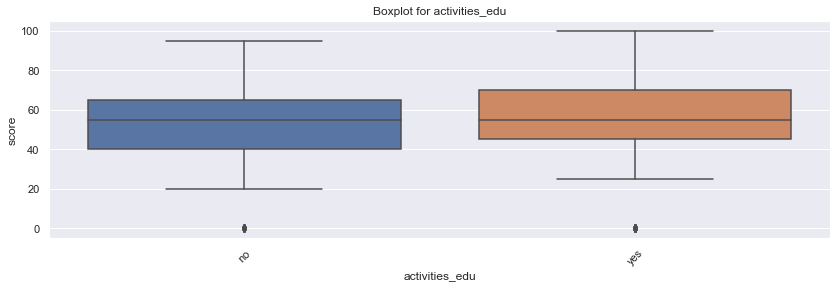

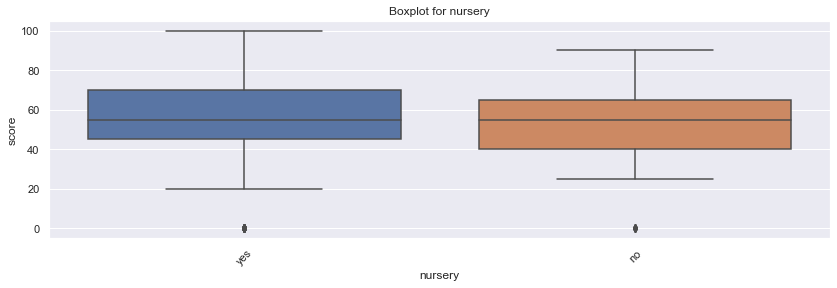

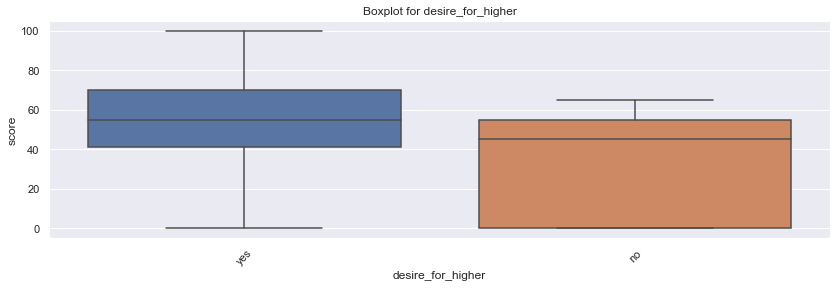

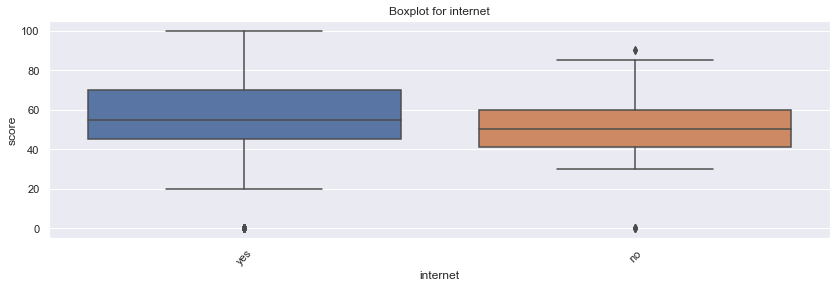

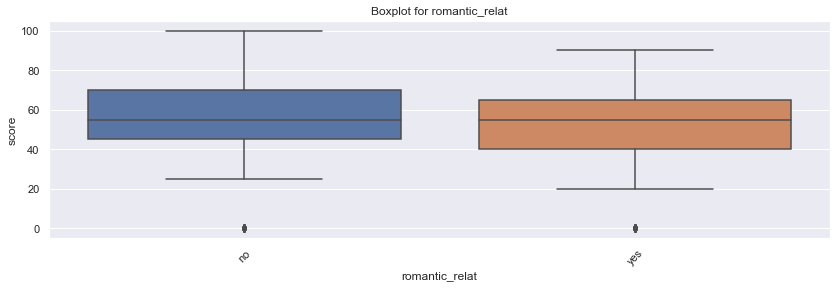

In [26]:
# Checking object features for their influence on target variable.
object_features_list = [
    'school', 'sex', 'domicile_area', 'family_size', 'parents_status', 'mother_job',
    'father_job', 'reason_of_choice', 'guardian', 'supplementary_edu', 'home_edu',
    'paid_edu', 'activities_edu', 'nursery', 'desire_for_higher', 'internet', 'romantic_relat'
]

for column in object_features_list:
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

It seems like the object features which have a significant influence on score are 'domicile_area', 'mother_job', 'father_job', 'supplementary_edu' and 'desire_for_higher'. But graphs can be deceptive, so let's test our hypotheses.

<h2>Step 8. Statistical Hypothesis Testing</h2>

Let's test the validity of our hypotheses using the 'ttest_ind' function of the SciPy library.

In [27]:
# Checking our ideas with the t-statistics.
for column in object_features_list:
    columns = stud.loc[:, column].value_counts().index[:5]
    combinations_all = list(it.combinations(columns, 2))
    for comb in combinations_all:
        if stat.ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
        <= 0.05/len(combinations_all):
            print('Statistically significant differences were found for the "'+column+'" feature')
        break

Statistically significant differences were found for the "sex" feature
Statistically significant differences were found for the "domicile_area" feature
Statistically significant differences were found for the "desire_for_higher" feature
Statistically significant differences were found for the "romantic_relat" feature


Some of our assumptions were actually correct. The domicile area, as well as teenager's desire to get a higher education, have an impact on his/her academic performance. Urban residents generally receive higher grades than rural residents. Those who want to get a higher education do much better in exams than those who don't want to get it. Also male students on average performed better than female students, as well as students without a boyfriend/girlfriend outperformed those who were involved in romantic relationships.

Let's remove those features that do not have a statistically significant effect on the target variable.

In [28]:
# Removing object features, which doesn't affect the score.
for column in [
    'school', 'family_size', 'parents_status', 'mother_job', 'father_job', 
    'reason_of_choice', 'guardian', 'supplementary_edu', 'home_edu', 'paid_edu', 
    'activities_edu', 'nursery', 'internet'
]:
    stud.drop([column], inplace = True, axis = 1)

<h2>Step 9. Recap & Conclusions</h2>

Let's follow the actions taken during the analysis.

1. We initialized necessary libraries, set visualization conditions and loaded the dataset.
2. We improved readability of the data and calculated the number of unique values for each variable. It became clear that we were dealing with a large number of categorical features (both object and int/float) and several continuous ones.
3. We checked the data for missing values and removed the missing values from the target variable. Then we checked the data for duplicates and found out that there are no duplicates. 
4. After processing the data, we built histograms for all features in the dataset. Using histograms, we evaluated distributions, identified and corrected a couple misspeled values. 
5. We defined a function for detecting outliers and applied it to numeric features. There were not many outliers, but we still widen the range to save some values.
6. After that, we created a correlation matrix, found a lot of positive and inverse correlations, identified numeric variables that correlate with the target variable, and removed some of the columns that do not correlate with it directly.
7. We created boxplots for object features and tried to guess which ones might affect the target variable. 
8. To make sure that we were right, we tested our hypotheses using the T-test. Some of our hypotheses were correct, so we removed columns, which doesn't affect the target variable.

Now let's summarize which variables we saved and why. 
- Gender, domicile area, desire to get a higher education, and romantic relationships may be related to the students grades based on the results of T-test.
- Parents educational levels and home study time correlate positively with math score. 
- Off-school troubles, time spent with friends, and age are inversely correlated with math score. 

Based on this data, we can assume the possibility of creating a machine learning model that will allow us to identify students at risk.

We can cautiously assume that this group may include older students living in rural areas, whose parents do not have education. Presumably, these teenagers spend a lot of time with friends and have romantic relationships.

In [29]:
stud.info()
stud.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                372 non-null    object 
 1   age                372 non-null    float64
 2   domicile_area      358 non-null    object 
 3   mother_edu         369 non-null    float64
 4   father_edu         348 non-null    float64
 5   home_study_time    367 non-null    float64
 6   off_school_fails   350 non-null    float64
 7   desire_for_higher  353 non-null    object 
 8   romantic_relat     341 non-null    object 
 9   friends_time       365 non-null    float64
 10  score              372 non-null    float64
dtypes: float64(7), object(4)
memory usage: 34.9+ KB


,sex,age,domicile_area,mother_edu,father_edu,home_study_time,off_school_fails,desire_for_higher,romantic_relat,friends_time,score
0,female,18.0,urban_area,4.0,4.0,2.0,0.0,yes,no,4.0,30.0
1,female,17.0,urban_area,1.0,1.0,2.0,0.0,yes,no,3.0,30.0
2,female,15.0,urban_area,1.0,1.0,2.0,3.0,yes,NaN,2.0,50.0
3,female,15.0,urban_area,4.0,2.0,3.0,0.0,yes,yes,2.0,75.0
4,female,16.0,urban_area,3.0,3.0,2.0,0.0,yes,no,2.0,50.0
